In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import os
import scipy
print(os.listdir())

['.git', '.gitignore', '.gitmodules', '2_circles.py', 'callibrate_circle_test.py', 'COMMANDS.md', 'coords.py', 'cv_example1.py', 'cv_tracking_test.py', 'images', 'LICENSE', 'lumax', 'lumax_demo.py', 'my_hough.ipynb', 'README.md', 'rectangle_detect.py', 'requirements.txt', 'tests', 'tracker.py', '__pycache__']


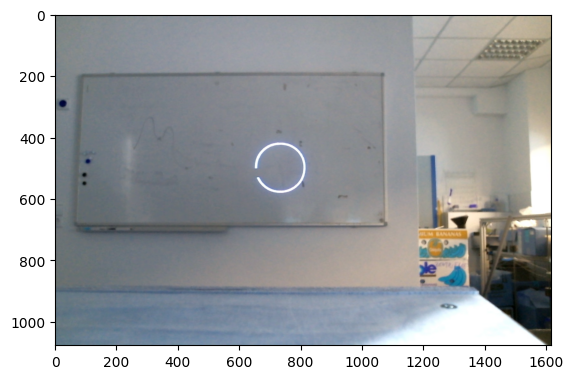

In [2]:
test_img=cv2.imread("images/circle2_part2.jpg")
plt.imshow(test_img)
plt.show()

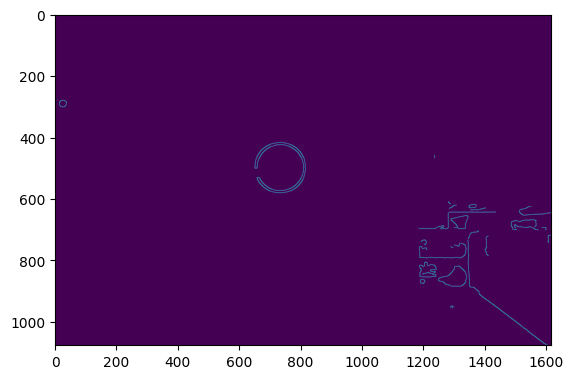

(1077, 1616)

In [3]:
canny=cv2.Canny(cv2.blur(test_img,(5,5)),100,200)
plt.imshow(canny)
plt.show()
canny.shape

In [4]:
edge_pixels=np.where(canny==255)
P_space=np.zeros((400,canny.shape[0],canny.shape[1]))
anglesX=np.cos(np.arange(180)*2)
anglesY=np.sin(np.arange(180)*2)
for r in range(0,400):
    if r%15==0:
        print(r)
    for p in range(len(edge_pixels[0])) :
        x=edge_pixels[0][p]
        y=edge_pixels[1][p]
        for theta in range(180):
            a=int(x-r*anglesX[theta])
            b=int(y-r*anglesY[theta])
            
            try:
                P_space[r][a][b]=P_space[r][a][b]+1
            except:
                pass#print("Index out of bounds, doesnt matter")
            

0
15
30
45
60
75
90
105
120
135
150
165
180
195
210
225
240
255
270
285
300
315
330
345
360
375
390


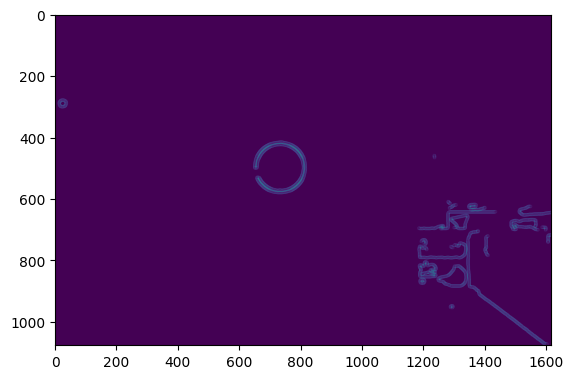

In [17]:
plt.imshow(P_space[5])


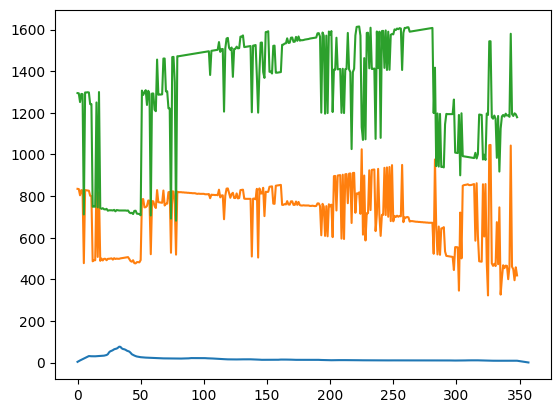

83


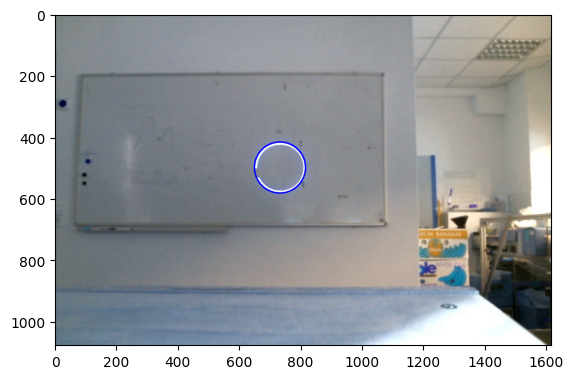

In [10]:
loc_max=[]
for r_img in P_space:
    loc_max.append(np.max(r_img))
a_max=[]
for r_img in P_space:
    a_max.append(np.where(r_img==np.max(r_img))[0][0])
b_max=[]
for r_img in P_space:
    b_max.append(np.where(r_img==np.max(r_img))[1][0])

loc_max=scipy.signal.fftconvolve(loc_max[50:399],[.1]*10)#blur
a_max=a_max[50:399]
b_max=b_max[50:399]
#a_max=scipy.signal.fftconvolve(a_max[50:399],[.2]*5)
#b_max=scipy.signal.fftconvolve(b_max[50:399],[.2]*5)
plt.plot(loc_max)
plt.plot(a_max)
plt.plot(b_max)
plt.show()
max_=scipy.signal.find_peaks(loc_max,distance=20,width=15)[0]
#print(max_[0])
circles=[]
c_img=test_img
for peak in max_:
    print(peak+50)
    circles.append((a_max[peak],b_max[peak],peak+50))
for circle in circles:
    cv2.circle(c_img,(circle[1],circle[0]),circle[2],(0,0,255),3)#
plt.imshow(c_img)

[149 311 355]


TypeError: unsupported operand type(s) for +: 'dict' and 'int'